# load data


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.head()

,customerid,gender,age,annual income (k$),spending score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.drop('customerid',axis=1,inplace=True)

In [7]:
df

,gender,age,annual income (k$),spending score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [8]:
df.isna()

,gender,age,annual income (k$),spending score (1-100)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [9]:
df.isna().sum()

gender                    0
age                       0
annual income (k$)        0
spending score (1-100)    0
dtype: int64

### EDA

In [10]:
import seaborn as sns 
import matplotlib.pyplot as plt

<Axes: xlabel='age', ylabel='annual income (k$)'>

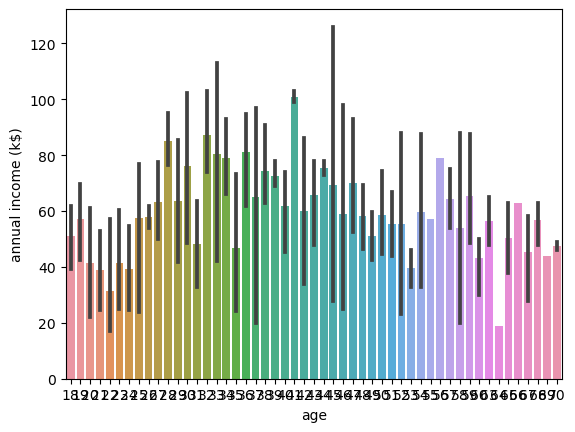

In [11]:
sns.barplot(data=df,y='annual income (k$)',x='age')

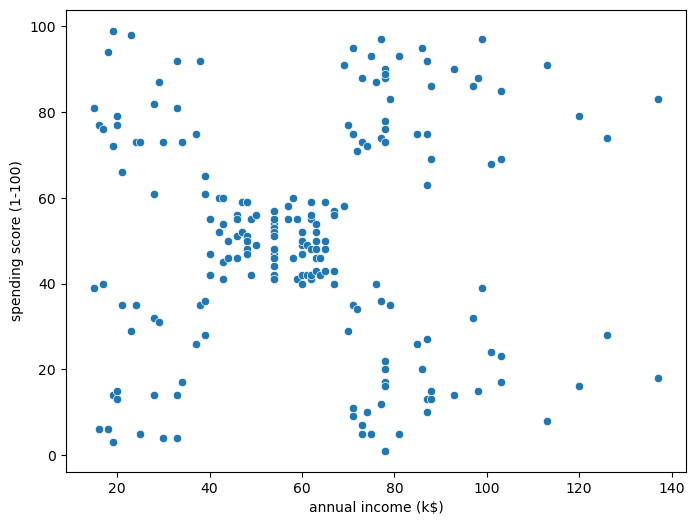

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='annual income (k$)',y='spending score (1-100)')
plt.show()

C:\Users\kk687\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kk687\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kk687\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


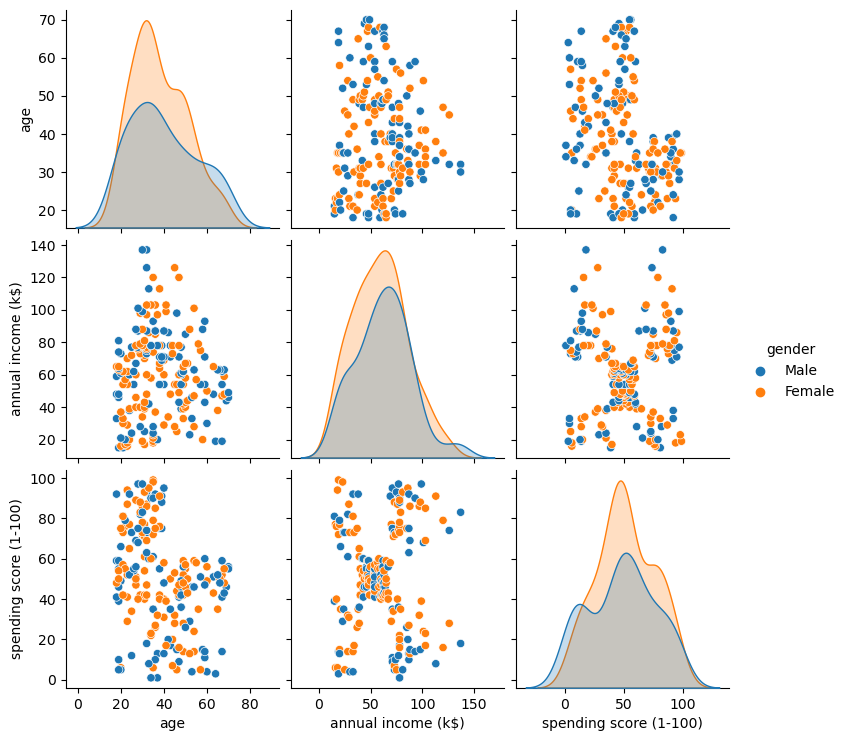

In [13]:
sns.pairplot(df, hue="gender")
plt.show()


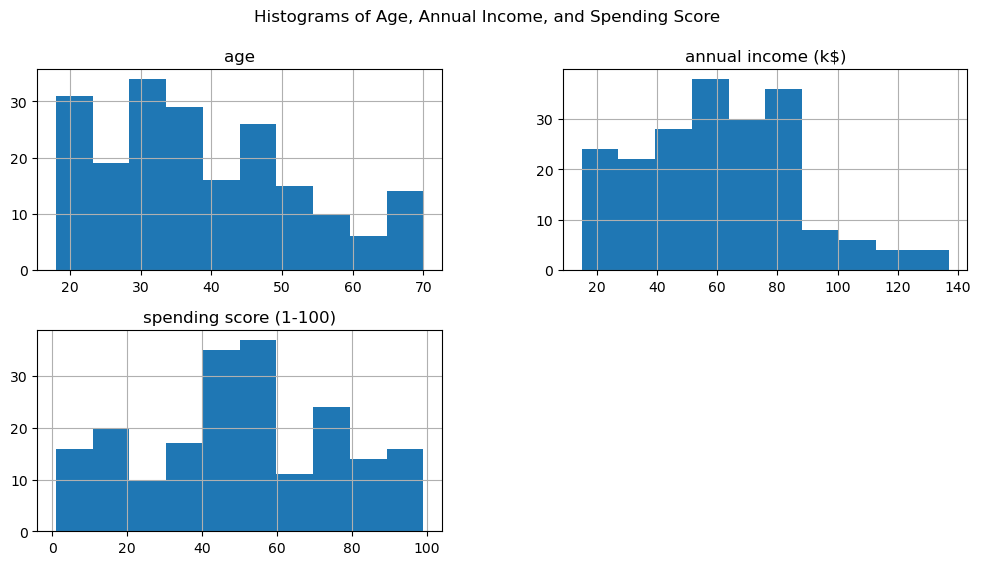

In [14]:
df[['age', 'annual income (k$)', 'spending score (1-100)']].hist(bins=10, figsize=(12, 6))
plt.suptitle('Histograms of Age, Annual Income, and Spending Score')
plt.show()


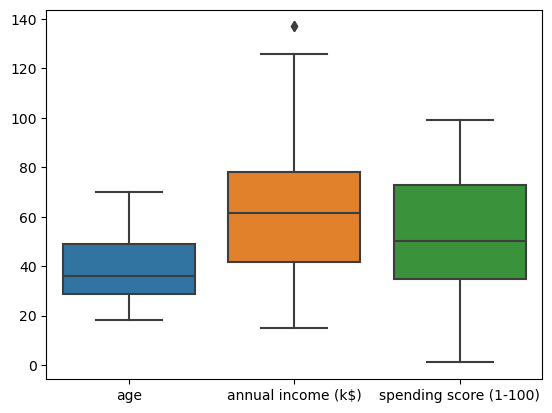

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplots for visual inspection
sns.boxplot(data=df[['age', 'annual income (k$)', 'spending score (1-100)']])
plt.show()


In [16]:
df.head()

,gender,age,annual income (k$),spending score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [17]:
df['gender'] = df['gender'].map({'Male':1,'Female':0})

In [18]:
df.sample(6)

,gender,age,annual income (k$),spending score (1-100)
17,1,20,21,66
138,1,19,74,10
100,0,23,62,41
197,1,32,126,74
155,0,27,78,89
0,1,19,15,39


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler= StandardScaler()

In [21]:
features_to_scale = ['age', 'annual income (k$)', 'spending score (1-100)']

df_scaled = df.copy()  # Keep the original DataFrame intact

In [22]:
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [23]:
df_scaled.head()

,gender,age,annual income (k$),spending score (1-100)
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980


KMEANS clustering

In [24]:
from sklearn.cluster import KMeans

In [25]:
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    

C:\Users\kk687\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kk687\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kk687\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kk687\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [26]:
wcss

[649.28,
 438.5224115567775,
 344.40542886953494,
 254.28290726083475,
 216.7849015165104,
 181.9514362434146,
 164.7765834879395,
 153.1195442545863,
 142.2126283335743,
 132.6098531526912]

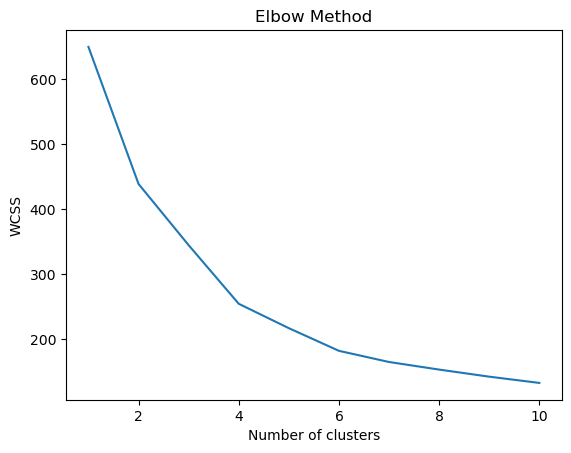

In [27]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##### k=4

model evaluation

### **Silhouette Score: A Measure of Clustering Quality**

The **silhouette score** is a metric used to evaluate the **quality of clusters** in a clustering algorithm like **K-Means**. It measures how well each data point fits within its assigned cluster compared to other clusters.

---

### **How Silhouette Score is Calculated:**
For each data point \(i\):
1. **Intra-cluster Distance (a)**:  
   The average distance between \(i\) and all other points in the **same cluster**.
   
2. **Nearest-cluster Distance (b)**:  
   The average distance between \(i\) and all points in the **nearest neighboring cluster** (the closest cluster that \(i\) is not part of).

3. **Silhouette Coefficient (s)**:  
   The silhouette score for a single data point \(i\) is calculated as:
   \[
   s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
   \]
   - \(s(i) = 1\): Perfectly clustered.
   - \(s(i) = 0\): Indifferent (on the border between two clusters).
   - \(s(i) = -1\): Misclassified (belongs to the wrong cluster).

---

### **Overall Silhouette Score**:
The overall silhouette score is the **mean** of the silhouette coefficients for all data points:
\[
\text{Silhouette Score} = \frac{1}{n} \sum_{i=1}^{n} s(i)
\]
Where \(n\) is the total number of data points.

---

### **Interpretation of Silhouette Score**:
- **1.0**: Clear, well-separated clusters.
- **0.5 - 0.9**: Reasonably good clustering.
- **0.0 - 0.5**: Overlapping clusters.
- **< 0**: Poor clustering, with data points assigned to the wrong clusters.

---

### **Example in Python**:

```python
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming df_scaled is your scaled data
kmeans = KMeans(n_clusters=3, random_state=42).fit(df_scaled)
score = silhouette_score(df_scaled, kmeans.labels_)

print(f"Silhouette Score: {score:.2f}")
```

---

### **When to Use Silhouette Score:**
- To **evaluate clustering algorithms**.
- To **choose the optimal number ts or calculating silhouette scores for different `K` values?

In [28]:
from sklearn.metrics import silhouette_score


km  = KMeans(n_clusters=4,random_state=42)

In [29]:
km.fit(df_scaled)

C:\Users\kk687\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kk687\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [30]:
km.inertia_

254.28290726083475

In [31]:
scores = silhouette_score(df_scaled,km.labels_)


In [32]:
print(f"Silhouette Score: {scores:.2f}")


Silhouette Score: 0.35


A **Silhouette Score** of **0.35** indicates that your clusters are **moderately well-formed** but may still overlap or have room for improvement.

### **How to Interpret the Score:**
- **0.51 to 1.0**: Strong, well-separated clusters.
- **0.31 to 0.50**: Moderate clustering (reasonable but could be improved).
- **0.1 to 0.30**: Weak clustering, overlapping clusters.
- **< 0**: Poor clustering, potential misclassification.

---

### **Suggestions to Improve the Score:**
1. **Try Different Values of `K`**:
   - Use the **Elbow Method** and evaluate different `K` values to find the optimal number of clusters.

2. **Feature Selection**:
   - Some features might not contribute to good clustering. Try removing **less relevant features**.

3. **Feature Scaling**:
   - Ensure that all numerical features are scaled properly using **StandardScaler** or **MinMaxScaler**.

4. **Outlier Removal**:
   - Outliers can distort clustering. Consider detecting and removing them before clustering.

5. **Algorithm Change**:
   - If K-Means doesn’t perform well, try other algorithms like **DBSCAN** or **Agglomerative Clustering**.

---



In [33]:
df_scaled

,gender,age,annual income (k$),spending score (1-100)
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,0,-0.276302,2.268791,1.118061
196,0,0.441365,2.497807,-0.861839
197,1,-0.491602,2.497807,0.923953
198,1,-0.491602,2.917671,-1.250054


In [34]:
from scipy.stats import zscore

In [35]:
import numpy as np
z_scores = np.abs(zscore(df))

In [36]:
z_scores

,gender,age,annual income (k$),spending score (1-100)
0,1.128152,1.424569,1.738999,0.434801
1,1.128152,1.281035,1.738999,1.195704
2,0.886405,1.352802,1.700830,1.715913
3,0.886405,1.137502,1.700830,1.040418
4,0.886405,0.563369,1.662660,0.395980
...,...,...,...,...
195,0.886405,0.276302,2.268791,1.118061
196,0.886405,0.441365,2.497807,0.861839
197,1.128152,0.491602,2.497807,0.923953
198,1.128152,0.491602,2.917671,1.250054


In [37]:
df[(z_scores < 3).all(axis=1)]

,gender,age,annual income (k$),spending score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18



since z_Score is not working with this data ....lets train the kmeans with less feature ....remove age and gender and use only the other two

In [38]:
km_1= KMeans(n_clusters=4,random_state=42)

In [39]:
df_scaled.columns

Index(['gender', 'age', 'annual income (k$)', 'spending score (1-100)'], dtype='object')

In [40]:
km_1.fit(df_scaled[['annual income (k$)', 'spending score (1-100)']])

C:\Users\kk687\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kk687\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [41]:
km_1.labels_

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [42]:
scores_1=silhouette_score(df[['annual income (k$)', 'spending score (1-100)']],km_1.labels_)

In [43]:
scores_1

0.4931963109249047

lets try PCA

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca= PCA(n_components=2)

In [46]:
df_fin = df_scaled.copy()

In [47]:
df_fin

,gender,age,annual income (k$),spending score (1-100)
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,0,-0.276302,2.268791,1.118061
196,0,0.441365,2.497807,-0.861839
197,1,-0.491602,2.497807,0.923953
198,1,-0.491602,2.917671,-1.250054


In [48]:
pca_res= pca.fit_transform(df_scaled)

In [49]:
pca_res[:,1]

array([-1.73717898, -1.78912423, -1.69277231, -1.78131664, -1.67869121,
       -1.7438065 , -1.58773793, -1.72769057, -1.4504641 , -1.64691155,
       -1.45931005, -1.67316678, -1.47928386, -1.62698028, -1.4775323 ,
       -1.59402762, -1.5119479 , -1.54249961, -1.35564719, -1.51942393,
       -1.3581841 , -1.42787781, -1.29854428, -1.37824333, -1.18081367,
       -1.27973079, -1.22201945, -1.24030551, -1.19219654, -1.29925241,
       -1.04033961, -1.24639609, -0.93948134, -1.12363553, -0.99990451,
       -1.14271163, -0.97923844, -1.07668528, -0.88841312, -0.98424904,
       -0.80653185, -0.9215865 , -0.76297435, -0.8683056 , -0.78987897,
       -0.88707148, -0.7857178 , -0.8192929 , -0.80880776, -0.80496414,
       -0.70744741, -0.70936988, -0.70659291, -0.62129927, -0.65812382,
       -0.61912313, -0.62473991, -0.54538128, -0.5959843 , -0.49992291,
       -0.48053526, -0.57721909, -0.4823367 , -0.51661833, -0.4111391 ,
       -0.50824685, -0.48769981, -0.43699803, -0.50632504, -0.50

In [50]:
df_fin['PCA_1'] = pca_res[:,0]
df_fin['PCA_2'] = pca_res[:,1]

In [51]:
df_fin

,gender,age,annual income (k$),spending score (1-100),PCA_1,PCA_2
0,1,-1.424569,-1.738999,-0.434801,-0.600438,-1.737179
1,1,-1.281035,-1.738999,1.195704,-1.649886,-1.789124
2,0,-1.352802,-1.700830,-1.715913,0.315381,-1.692772
3,0,-1.137502,-1.700830,1.040418,-1.477989,-1.781317
4,0,-0.563369,-1.662660,-0.395980,-0.060545,-1.678691
...,...,...,...,...,...,...
195,0,-0.276302,2.268791,1.118061,-1.101819,2.201867
196,0,0.441365,2.497807,-0.861839,0.792047,2.517450
197,1,-0.491602,2.497807,0.923953,-1.089706,2.470818
198,1,-0.491602,2.917671,-1.250054,0.425949,2.964343


In [52]:
km_2 = KMeans(n_clusters=4,random_state=42)

In [53]:
km_2.fit(df_fin[['PCA_1','PCA_2']])

C:\Users\kk687\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kk687\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [54]:
km_2.labels_

array([2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 1,
       1, 3, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 1, 3, 1, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [55]:
scores_2  = silhouette_score(df_fin[['PCA_1','PCA_2']],km_2.labels_)

In [56]:
scores_2

0.4232584673975909


lets use the first one km_1

In [57]:
scores_1

0.4931963109249047

In [58]:
km_1.labels_

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [59]:
df['cluster_km_1'] = km_1.labels_

In [60]:
df

,gender,age,annual income (k$),spending score (1-100),cluster_km_1
0,1,19,15,39,0
1,1,21,15,81,3
2,0,20,16,6,0
3,0,23,16,77,3
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,2
197,1,32,126,74,1
198,1,32,137,18,2


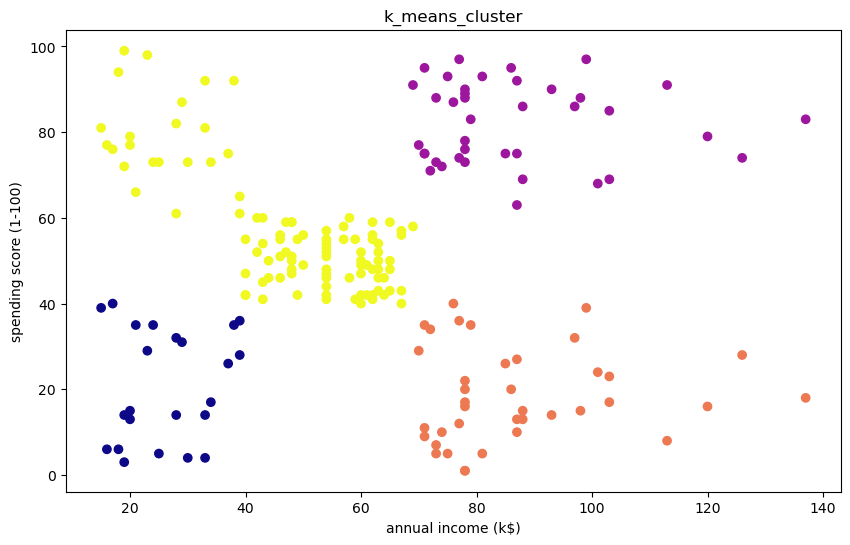

In [61]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['annual income (k$)'],y=df['spending score (1-100)'],c=df['cluster_km_1'],cmap='plasma')
plt.title('k_means_cluster')
plt.xlabel('annual income (k$)')
plt.ylabel('spending score (1-100)')
plt.show()

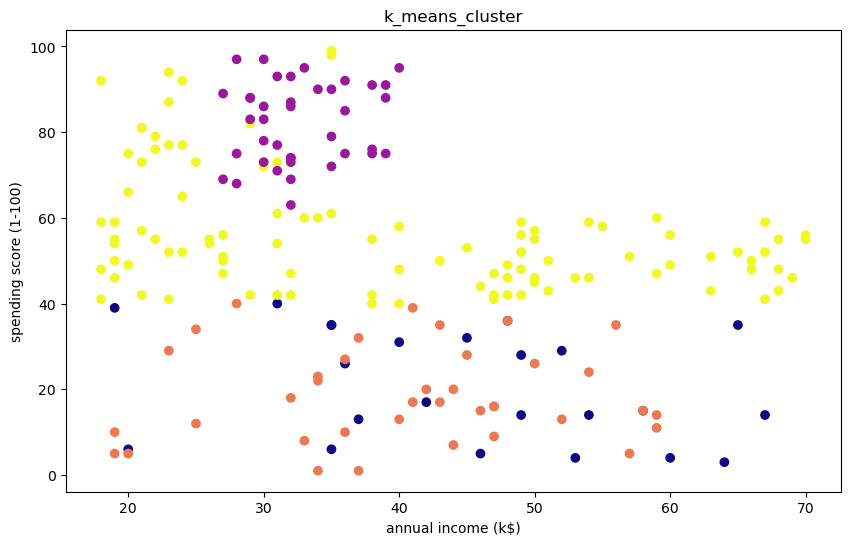

In [62]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['age'],y=df['spending score (1-100)'],c=df['cluster_km_1'],cmap='plasma')
plt.title('k_means_cluster')
plt.xlabel('annual income (k$)')
plt.ylabel('spending score (1-100)')
plt.show()

In [63]:
df

,gender,age,annual income (k$),spending score (1-100),cluster_km_1
0,1,19,15,39,0
1,1,21,15,81,3
2,0,20,16,6,0
3,0,23,16,77,3
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,2
197,1,32,126,74,1
198,1,32,137,18,2


In [65]:
df_cluster_0 = df[df['cluster_km_1']==0]

In [66]:
df_cluster_0

,gender,age,annual income (k$),spending score (1-100),cluster_km_1
0,1,19,15,39,0
2,0,20,16,6,0
4,0,31,17,40,0
6,0,35,18,6,0
8,1,64,19,3,0
10,1,67,19,14,0
12,0,58,20,15,0
14,1,37,20,13,0
16,0,35,21,35,0
18,1,52,23,29,0


In [67]:
df_cluster_1 = df[df['cluster_km_1']==1]

In [68]:
df_cluster_1

,gender,age,annual income (k$),spending score (1-100),cluster_km_1
123,1,39,69,91,1
125,0,31,70,77,1
127,1,40,71,95,1
129,1,38,71,75,1
131,1,39,71,75,1
133,0,31,72,71,1
135,0,29,73,88,1
137,1,32,73,73,1
139,0,35,74,72,1
141,1,32,75,93,1


In [69]:
df_cluster_2 = df[df['cluster_km_1']==2]

In [70]:
df_cluster_2

,gender,age,annual income (k$),spending score (1-100),cluster_km_1
124,0,23,70,29,2
126,1,43,71,35,2
128,1,59,71,11,2
130,1,47,71,9,2
132,0,25,72,34,2
134,1,20,73,5,2
136,0,44,73,7,2
138,1,19,74,10,2
140,0,57,75,5,2
142,0,28,76,40,2


In [71]:
df_cluster_3 = df[df['cluster_km_1']==3]

In [72]:
df_cluster_3

,gender,age,annual income (k$),spending score (1-100),cluster_km_1
1,1,21,15,81,3
3,0,23,16,77,3
5,0,22,17,76,3
7,0,23,18,94,3
9,0,30,19,72,3
...,...,...,...,...,...
118,0,51,67,43,3
119,0,50,67,57,3
120,1,27,67,56,3
121,0,38,67,40,3
